### Exploratory Data Analysis: Penguin Size Dataset

This dataset contains measurements for penguins, including species, island, culmen length and depth, flipper length, body mass, and sex. The analysis explores physical differences across species and between males and females.


In [ ]:
# Import libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the penguins_size dataset 
penguins_df = pd.read_csv('penguins_size.csv', delimiter=',', skipinitialspace=True)

### Data Cleaning

Data types were checked and columns `flipper_length_mm` and `body_mass_g` were converted to integers using NumPy’s `int64` type. Duplicate rows were removed.

### Handling Missing Data

Rows containing NaN values or invalid entries (e.g., '.' in the sex column) were removed to ensure data consistency.

In [47]:
penguins_df = penguins_df.dropna()
penguins_df = penguins_df[penguins_df["sex"] != "."]

In [48]:
penguins_df.info()
penguins_df['flipper_length_mm'] = penguins_df['flipper_length_mm'].astype(np.int64)
penguins_df['body_mass_g'] = penguins_df['body_mass_g'].astype(np.int64)

<class 'pandas.core.frame.DataFrame'>
Index: 333 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            333 non-null    object 
 1   island             333 non-null    object 
 2   culmen_length_mm   333 non-null    float64
 3   culmen_depth_mm    333 non-null    float64
 4   flipper_length_mm  333 non-null    float64
 5   body_mass_g        333 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 20.8+ KB


In [49]:
penguins_df = penguins_df.drop_duplicates()

### Exploring Relationships Between Features

This section examines how key penguin measurements relate to each other across species and sexes. Insights include differences in body mass, culmen dimensions, and flipper length, as well as patterns based on the islands penguins inhabit.

Text(0, 0.5, 'Mean Body Mass (g)')

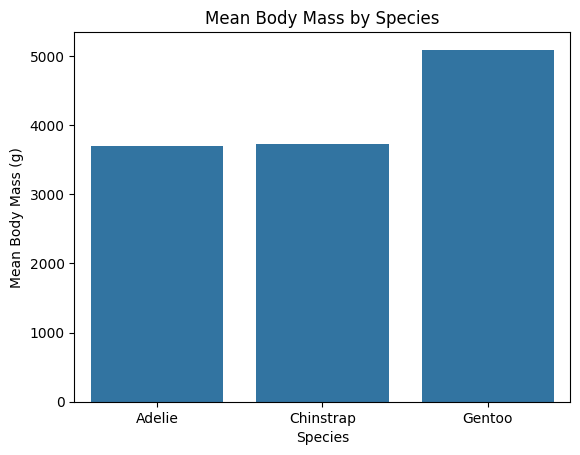

In [50]:
mean_body_mass = penguins_df.groupby('species')['body_mass_g'].mean().reset_index()

sns.barplot(x='species', y='body_mass_g', data=mean_body_mass)
plt.title('Mean Body Mass by Species')
plt.xlabel('Species')
plt.ylabel('Mean Body Mass (g)')


Gentoo penguins are the heaviest (+/-5000g on average), while Adelie and Chinstrap are slightly lighter, just under 4000g.

Text(0, 0.5, 'Penguins count')

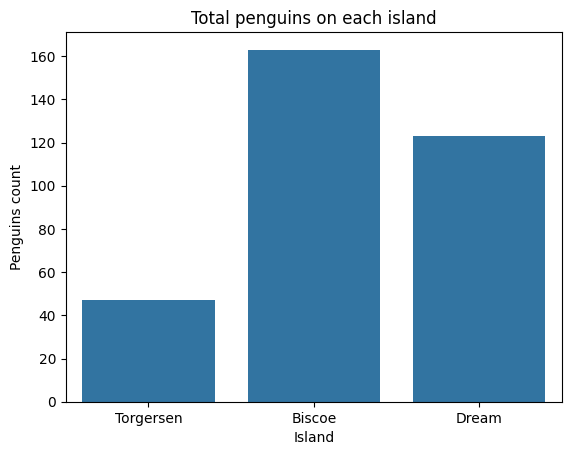

In [51]:
sns.countplot(x='island', data=penguins_df)
plt.title('Total penguins on each island')
plt.xlabel('Island')
plt.ylabel('Penguins count')


Biscoe Island has the highest penguin population (+/-160), followed by Dream (+/-120) and Torgersen (+/-50).


### Examine the relationship between culmen depth and culmen length for each species and which islands the species are from.

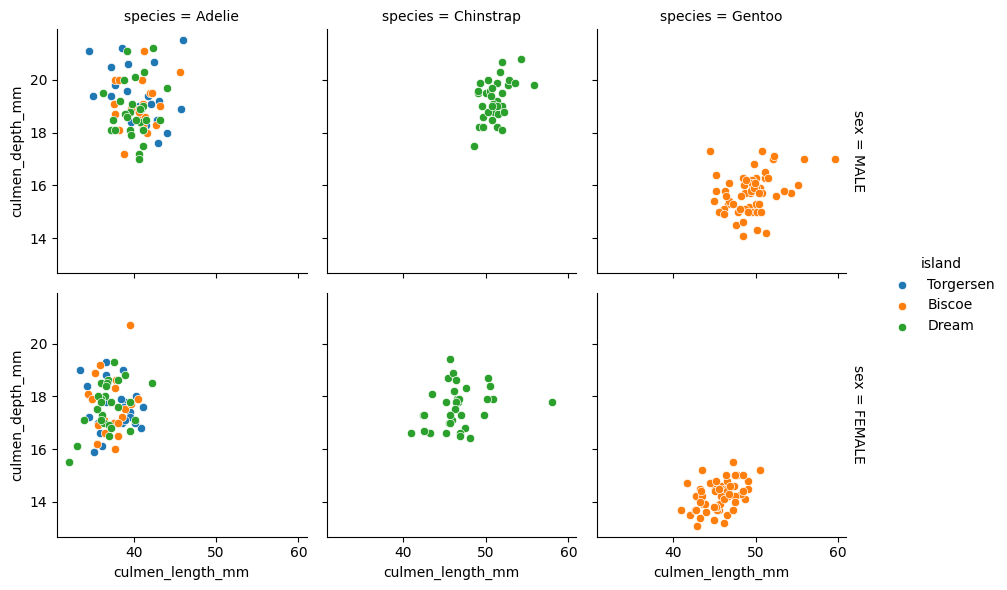

In [52]:
fg = sns.FacetGrid(penguins_df, row="sex", col="species", hue="island",
margin_titles=True)
fg.map_dataframe(sns.scatterplot, x="culmen_length_mm", y="culmen_depth_mm")
fg.add_legend()


Males generally have larger culmen lengths and depths than females.
Adelie penguins inhabit all three islands, Chinstrap penguins only Dream, and Gentoo penguins only Biscoe.
Across all species, culmen length and depth show a positive correlation.


Text(0.5, 0, 'flipper length')

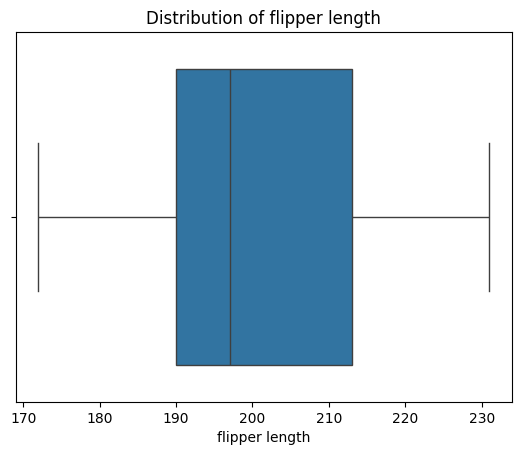

In [53]:
sns.boxplot(data=penguins_df, x='flipper_length_mm')
plt.title('Distribution of flipper length')
plt.xlabel('flipper length')

Most penguins have flipper lengths between roughly 190–215 mm.